In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC


In [3]:

X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()


In [7]:
np.random.seed(42)

def lsvc_explore_and_graph(c_vals):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(LinearSVC(), hyperparameters, cv=5)
    clf.fit(X_train, y_train)
    cv_scores = clf.cv_results_['mean_test_score']
    cv_standard_deviations = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']

    print("Best C: ", optimal_c_val)
    print("Train score: ", LinearSVC(C=optimal_c_val).fit(X_train, y_train).score(X_train, y_train))

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.plot(c_vals, cv_scores)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.plot(c_vals, cv_standard_deviations)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Standard Deviation')
    plt.show()


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  2.636650898730358
Train score:  0.9211267605633803


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


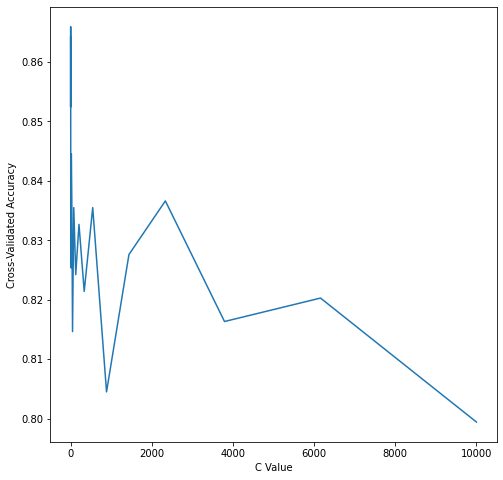

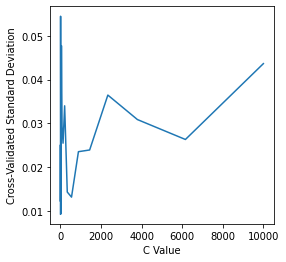

In [6]:
lsvc_explore_and_graph(np.logspace(0, 4, 20))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.00206913808111479
Train score:  0.9459154929577465


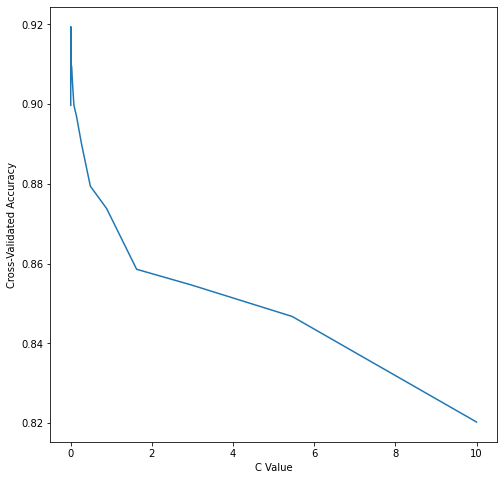

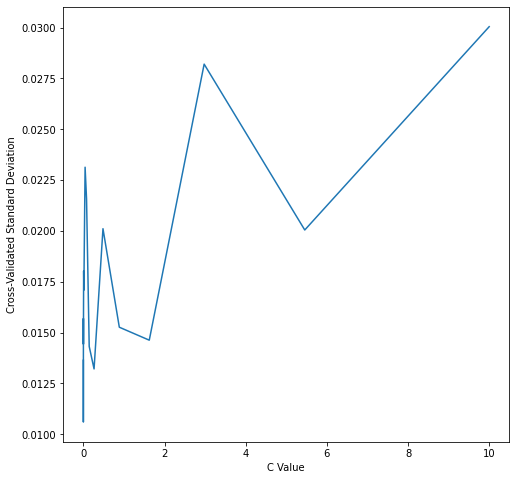

In [8]:
lsvc_explore_and_graph(np.logspace(-4, 1, 20))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.02040816326530612
Train score:  0.9515492957746479


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


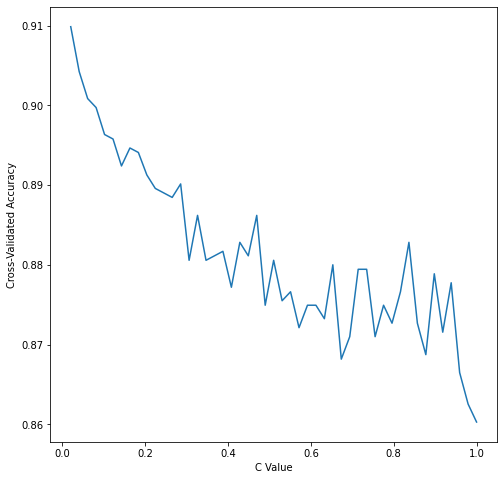

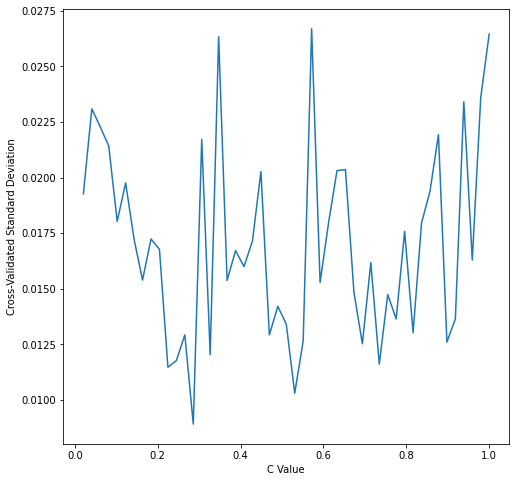

In [9]:
lsvc_explore_and_graph(np.linspace(0, 1, 50))

In [10]:
np.random.seed(42)

lsvc = LinearSVC(C=0.02040816326530612).fit(X_train, y_train)
print(
    "LSVC best training score: ",
    lsvc.score(X_train, y_train)
)
print(
    "LSVC best test score: ",
    lsvc.score(X_test, y_test)
)

LSVC best training score:  0.9515492957746479
LSVC best test score:  0.9121621621621622


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
